In [1]:
import numpy as np
from tqdm import tqdm 
import matplotlib.pyplot as plt
from matplotlib import patches as pt
N = 100  ##number of spins
spin_values = np.array([1,-1])
Spin_array = np.random.choice(spin_values,size = N)  ##creating spin array
J = 1.0 ##spin interaction constant


iter = 500000 
temp_array = np.linspace(0.05,4,10)  ##temperature array
N_iter = int(len(temp_array))  ##number of elements in temperature array ,
E_avg = np.array([])  ##list for average of energy
M_avg =np.array([]) ##list for magnetization i.e. total moment per spin 

for step in tqdm(range(N_iter)):
    
    T = temp_array[step]  ##indexing temperature
    
    Beta = 1.0/T 

    spin_array = Spin_array  ##we take  the last state as initial state every time for new temperature 
    ## Calculating initial energy  
    energy = 0
    for k in range(N-1):
        energy += -J*spin_array[k]*spin_array[k+1]

    m = np.sum(spin_array)   ##total magnetic moment
    E = []    ##storing energy value in a list
    Mag = []  ## ##storing magnetic moment value in a list
    
    for i in range(iter):
        ###these lines have already  been explained earlier
        r_n = np.random.randint(0,N)
        sigma_mu = spin_array[r_n]
        del_m = -2*sigma_mu
        if(r_n == 0):
            Sum = 2*J*sigma_mu*(spin_array[1]+spin_array[N-1])
        elif(r_n == N-1):
            Sum = 2*J*sigma_mu*(spin_array[N-2]+spin_array[0])
        else:
            Sum = 2*J*sigma_mu*(spin_array[r_n+1]+spin_array[r_n-1])

        del_E = Sum
        
        if(np.random.uniform()<np.exp(-Beta*del_E)):
            spin_array[r_n] = -1*spin_array[r_n]
            energy += del_E
            m+= del_m  

        else:
            spin_array[r_n] =spin_array[r_n]
        
        if(i>=100000 and i%N==0):  
            KK = np.where(spin_array==1)
            n_positive = np.sum(np.ones(N)[KK])
            n_negative = N-n_positive
            
            
            E.append(energy)
            Mag.append(abs(m))          
       
    ####calculating averages and storing them in numpy array
    E_avg = np.append(E_avg,(np.mean(np.array(E))))
    M_avg = np.append(M_avg,np.mean(np.array(Mag)))

100%|██████████| 10/10 [00:43<00:00,  4.34s/it]


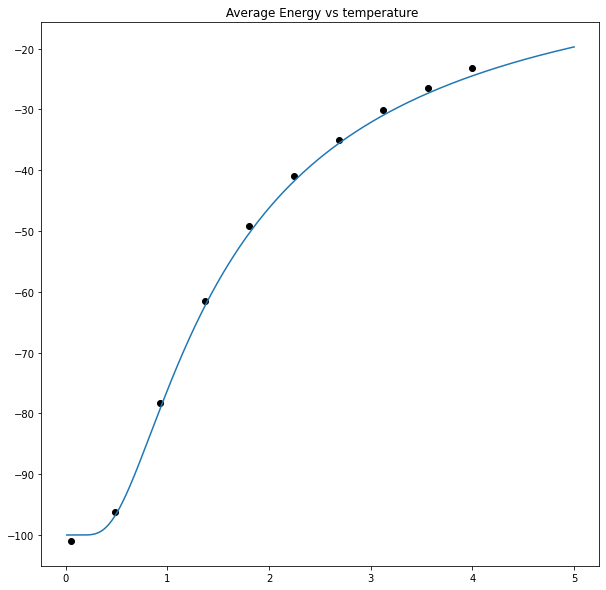

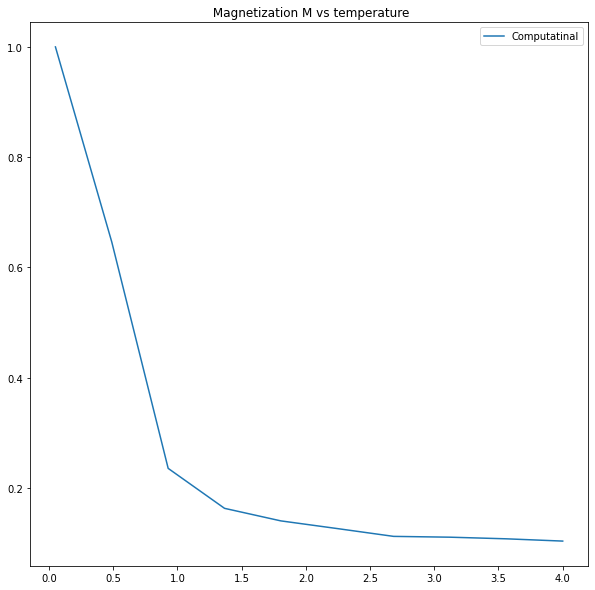

In [4]:
##calculating analytically                        
T_theory = np.linspace(0.01,5,1000)
E_theory = -N*J*np.tanh(J/T_theory)


#########################

fig,((ax1)) = plt.subplots(nrows = 1,ncols= 1,figsize = (10,10))
fig,((ax2)) = plt.subplots(nrows = 1,ncols= 1,figsize = (10,10))

ax1.set_title(" Average Energy vs temperature")
ax1.scatter(temp_array,E_avg,color = 'k',label = "Computatinal")
ax1.plot(T_theory,E_theory,label = "Theoretical")


ax2.set_title(" Magnetization M vs temperature")
ax2.plot(temp_array,M_avg/N,label = "Computatinal")

plt.legend()
plt.show()